In [1]:
using DelimitedFiles, HDF5, FileIO
using Plots, Rsvg, LaTeXStrings, StatsPlots
using Chemfiles, JUMD
using LinearAlgebra, Statistics
home = "/home/pbarletta/labo/18/lbp/run"
rtdos = "/home/pbarletta/labo/18/lbp/rtdos_log"
pyplot()

Plots.PyPlotBackend()

### Lee modos, volumen original y  volúmenes NDD. Obtiene VGV

In [5]:
pdb = "4xcp"
# Leo modos
modes_4xcp, evals_4xcp = JUMD.readPtrajModes(
    joinpath(home, pdb,  "pca", string("modes_", pdb)))

# AAs
aa3 = convert(Int64, length(evals_4xcp))
aa = convert(Int64, aa3 / 3)

# Leo volumen de la traj
trj_vol = convert(Array{Float64, 1}, 
    readdlm(joinpath(home, pdb, "cavidad", string("vol_trj_", pdb)))[:, 3]);

# Leo volúmene del average
vol_avg_4xcp = convert(Float64, readdlm(joinpath(home, pdb,  "ndd", string("vol_avg_", pdb)))[3])

# Leo volúmenes NDD
ndd_out_4xcp = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb,  "ndd", string("out_ndd_", pdb)))[2:end, 2])

# VGV
vgv_4xcp = (ndd_out_4xcp .- vol_avg_4xcp) .* evals_4xcp
vgv_4xcp = vgv_4xcp ./ norm(vgv_4xcp);

## Distancia entre extremos de ligando p/ las 3 poblaciones

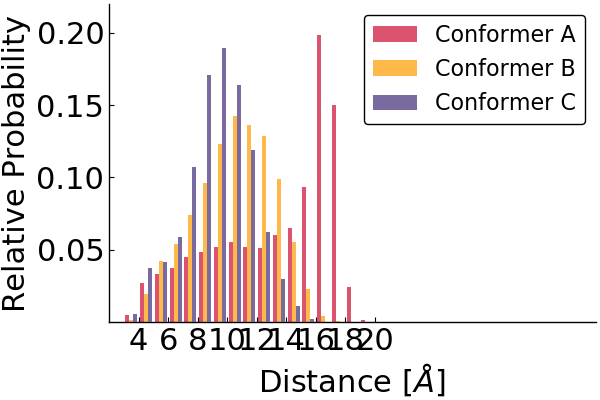

In [40]:
# Leo distancias
dis_lig_vol1 = h5read(joinpath(rtdos, string("dis_lig_", pdb, ".h5")), "vol1")
dis_lig_vol2 = h5read(joinpath(rtdos, string("dis_lig_", pdb, ".h5")), "vol2")
dis_lig_vol3 = h5read(joinpath(rtdos, string("dis_lig_", pdb, ".h5")), "vol3")

st = 1
bin_range = 2:st:20
bin_vol = collect(bin_range)
fa = .9

# Histograma ponderado
wgh_vol = fill(1.0, length(dis_lig_vol1))
bin_dis1_4xcp, his_dis1_4xcp = JUMD.weightedHist(dis_lig_vol1, bin_vol, wgh_vol, true, false)

wgh_vol = fill(1.0, length(dis_lig_vol2))
bin_dis2_4xcp, his_dis2_4xcp = JUMD.weightedHist(dis_lig_vol2, bin_vol, wgh_vol, true, false)

wgh_vol = fill(1.0, length(dis_lig_vol3))
bin_dis3_4xcp, his_dis3_4xcp = JUMD.weightedHist(dis_lig_vol3, bin_vol, wgh_vol, true, false)

grp = repeat(["Conformer A", "Conformer B", "Conformer C"], inner = length(bin_dis1_4xcp))
clr = repeat([colorant"#d64161", colorant"#feb236", colorant"#6b5b95"],
    inner = length(bin_dis1_4xcp))

plt_his_dis = groupedbar(
    repeat(bin_dis1_4xcp, outer = 3), hcat(his_dis1_4xcp, his_dis2_4xcp, his_dis3_4xcp),
    group = grp, fillcolor = clr,
    fillalpha = fa,
    xticks = 4:2:20, yticks = .05:.05:.22,
    xlims = (2, 35), 
    #xlims = (2, 20),
    ylims = (0, .22),
    
    linecolor = false, grid = false,
    
    guidefont = font(22, "Arial"), tickfont = font(22, "Arial"),
    legendfont = font(16, "Arial"), 
    legend = false,
    
    yaxis = "Relative Probability", xaxis = L"Distance $[\AA]$ ")

plot!(plt_his_dis, legend = (44, 1))

In [41]:
savefig(plt_his_dis, joinpath(rtdos, "papel", "6", string("6_legend_", pdb, ".svg")))